# **Introduction to Data Mining in Python**

Maintainer: Zhaohu(Jonathan) Fan  contact him (fanzh@ucmail.uc.edu)

Note: This lab note is still WIP, let us know if you encounter bugs or issues.


## 1. Supervised Learning: Classification Analysis
  * 1.1 K-Nearest Neighbor (KNN)
     * 1.1.1 Load and prepare the Iris dataset
     * 1.1.2 Train the model
     * 1.1.3 Prediction accuracy

## 2. Unsupervised Learning
  * 2.1 Clustering Analysis: K-means clustering
  * 2.2 Hierarchical clustering


#### *Colab Notebook [Open in Colab](https://colab.research.google.com/drive/16s3oJhemZGJt8LQHq2B7CS2GNkRU4_uW?usp=sharingg)*
#### *Useful information about [Introduction to Data Mining](https://yanyudm.github.io/Data-Mining-R/lecture/1.A_IntroDM.html)*




# 1 Supervised Learning: Classification Analysis
The outcome $Y$ is available (also called dependent variable, response in statistics). Then, a set of predictors, regressors, covariates, features, or independent variables.

There are two main types of problems, *regression problem* and *classification problem*.

## 1.1 K-Nearest Neighbor (KNN)

In order to demonstrate this simple machine learning algorithm, I use Iris dataset, a famous dataset for almost all machine learning courses, and apply KNN onto the dataset to train a classifier for Iris Species.
     
### 1.1.1 Load and prepare the Iris dataset
Before start, always do, you should

* set the working directory!
* create a new Python script (unless you are continuing last project)
* Save the Python script.


Let’s first load the **Iris** dataset. This is a very famous dataset in almost all data mining, machine learning courses, and it has been an R build-in dataset. The dataset consists of 50 samples from each of three species of Iris flowers (Iris setosa, Iris virginicaand Iris versicolor). Four features(variables) were measured from each sample, they are the **length** and the **width** of sepal and petal, in centimeters. It is introduced by Sir Ronald Fisher in 1936.

*  3 Species

<a >
    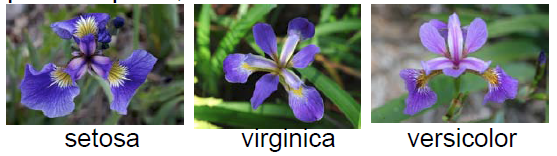
</a>


* Four features of flower: **length** and the **width** of sepal and petal

<a >
    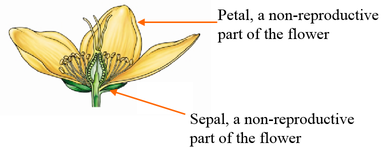
</a>

The *iris* flower data set is included in Python. It is a data frame with 150 cases (rows) and 5 variables (columns) named Sepal.Length, Sepal.Width, Petal.Length, Petal.Width, and Species.





First, load iris data to the current workspace

In [ ]:
import pandas as pd
import numpy as np
from sklearn import datasets
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
data = datasets.load_iris()
iris = pd.DataFrame(data.data, columns = data.feature_names)
iris['species'] = data.target
iris.replace({'species': {0: 'setosa', 1: 'versicolor', 2 : 'virginica'}}, inplace = True)

In [ ]:
iris

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


What is in the dataset? You can use head() or tail() to print the first or last few rows of a dataset:

In [ ]:
iris.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [ ]:
iris.tail()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica
149,5.9,3.0,5.1,1.8,virginica


Check dimensionality, the dataset has 150 rows(observations) and 5 columns (variables)



In [ ]:
iris.shape

(150, 5)

Variable names or column names



In [ ]:
iris.columns

Index(['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
       'petal width (cm)', 'species'],
      dtype='object')

Structure of the dataframe, note that the difference between float and object


In [ ]:
iris.dtypes

sepal length (cm)    float64
sepal width (cm)     float64
petal length (cm)    float64
petal width (cm)     float64
species               object
dtype: object

In [ ]:
iris['species'].dtypes

dtype('O')

In [ ]:
iris['petal length (cm)'].dtypes

dtype('float64')

In [ ]:
iris.groupby('species').size()

species
setosa        50
versicolor    50
virginica     50
dtype: int64

Simple summary statistics



In [ ]:
round(iris.describe(),2)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.00,150.00,150.00,150.00
mean,5.84,3.06,3.76,1.20
std,0.83,0.44,1.77,0.76
min,4.30,2.00,1.00,0.10
25%,5.10,2.80,1.60,0.30
50%,5.80,3.00,4.35,1.30
75%,6.40,3.30,5.10,1.80
max,7.90,4.40,6.90,2.50


Suppose we use the 30 observations of each flower as the training sample and the rest as testing sample.



### 1.1.2 Train the model

In Python, <code>KNeighborsClassifier()</code> function is designed to perform K-nearest neighbor. It is in package "sklearn.neighbors".



In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.model_selection import train_test_split

 Load and prepare the data
 Dividing data into features and labels

In [ ]:
data = datasets.load_iris()
iris = pd.DataFrame(data.data, columns = data.feature_names)
target = data.target
iris.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [ ]:
# Creating testing and training 
X_train, X_test, y_train, y_test = train_test_split(iris, target, test_size = 0.4, random_state = 0)

 Train the model

In [ ]:
model = KNeighborsClassifier(n_neighbors=5)
model.fit(X_train, y_train)

KNeighborsClassifier()

Here, the <code>KNeighborsClassifier()</code> requires the number of classes in 
which data is divided. After defining the model we fit the model on training data which constitutes of data points i.e. X_train and labels i.e. y_train.

### 1.1.3 Prediction accuracy


In [ ]:
y_pred = model.predict(X_test)
data = pd.DataFrame({'Predicted': y_pred, 'Actual': y_test})
confusion_matrix = pd.crosstab(data['Actual'], data['Predicted'], rownames=['Actual'], colnames=['Predicted'])
print(confusion_matrix)

Predicted   0   1   2
Actual               
0          16   0   0
1           0  22   1
2           0   2  19


In [ ]:
(y_pred != y_test).sum()

3

# 2 Unsupervised Learning

If you only have a set of features (predictors) measured on a set of samples(observations), and you do not have a outcome variable, you are dealing with unsupervised learning problems.

In this case, your objective could be very different. You may want to:

* find groups of samples that have similar behariors (clustering analysis);
* find linear combinations of feature that explain most of the variation(PCA: Principal Components Analysis).

It can be an useful pre-processing step for you to obtain labels for the supervised learning.

## 2.1 Clustering Analysis: K-means clustering

K-means clustering with 5 clusters, the  <code>sklearn.cluster </code> package provides the <code>KMeans </code>.



In [ ]:
from sklearn.cluster import KMeans

In [ ]:
model = KMeans(n_clusters=5, random_state = 0)
model.fit(iris)

KMeans(n_clusters=5, random_state=0)

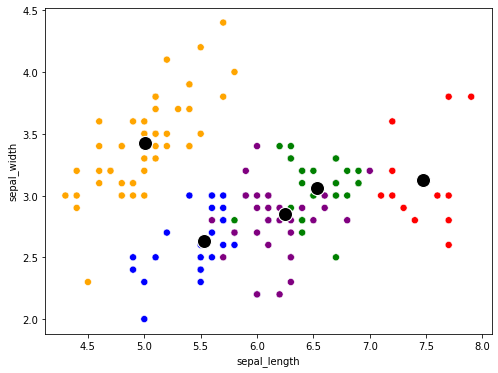

In [ ]:
kmeans = iris.copy()
kmeans_df = pd.DataFrame(kmeans)
kmeans_df.columns = ['sepal_length','sepal_width','petal_length','petal_width']
kmeans_df['species'] = model.predict(iris)

plt.figure(figsize = (8,6))
sns.scatterplot(x = 'sepal_length', y = 'sepal_width', hue = 'species', palette = ['orange','green','blue', 'red', 'purple'], s = 50, data = kmeans_df)
sns.scatterplot(x = model.cluster_centers_[:,0], y = model.cluster_centers_[:,1], s = 200, color = 'black')
plt.legend().set_visible(False)
plt.show()

Do you think it is a good solution? Try it with 3 clusters.



In [ ]:
model = KMeans(n_clusters=3, random_state = 0)
model.fit(iris)

KMeans(n_clusters=3, random_state=0)

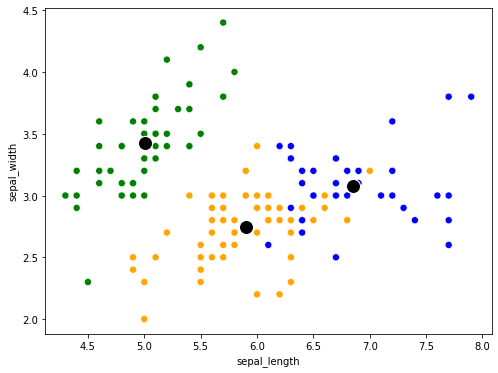

In [ ]:
kmeans = iris.copy()
kmeans_df = pd.DataFrame(kmeans)
kmeans_df.columns = ['sepal_length','sepal_width','petal_length','petal_width']
kmeans_df['species'] = model.predict(iris)

plt.figure(figsize = (8,6))
sns.scatterplot(x = 'sepal_length', y = 'sepal_width', hue = 'species', palette = ['orange','green','blue'], s = 50, data = kmeans_df)
sns.scatterplot(x = model.cluster_centers_[:,0], y = model.cluster_centers_[:,1], s = 200, color = 'black')
plt.legend().set_visible(False)
plt.show()

## 2.2 Hierarchical clustering


In [ ]:
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering


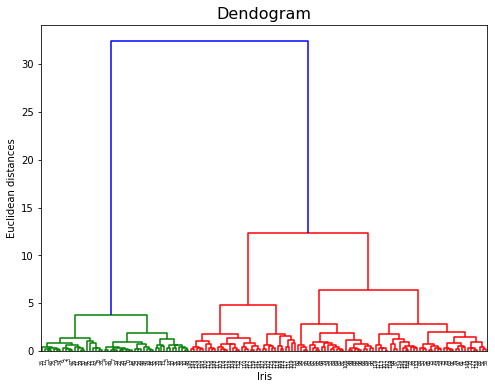

In [ ]:
plt.figure(figsize = (8,6))
dendrogram = sch.dendrogram(sch.linkage(iris, method='ward'))
plt.title('Dendogram', fontsize = 16)
plt.xlabel('Iris')
plt.ylabel('Euclidean distances')
plt.show()

**Ward** method is actually a method that tries to minimize the variance within each cluster

In [ ]:
from sklearn.cluster import AgglomerativeClustering

In [ ]:
cluster = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='ward')
cluster.fit_predict(iris)

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 0, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0])

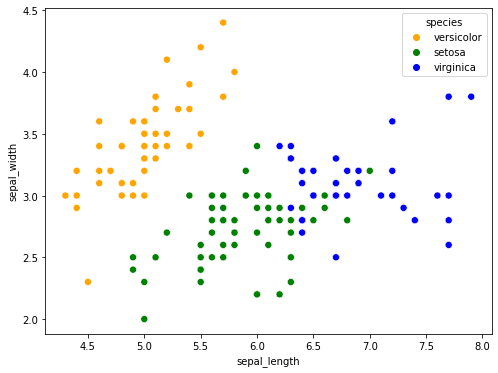

In [ ]:
clustering = iris.copy()
clustering_df = pd.DataFrame(clustering)
clustering_df.columns = ['sepal_length','sepal_width','petal_length','petal_width']
clustering_df['species'] = cluster.labels_
clustering_df.replace({'species': {0: 'setosa', 1: 'versicolor', 2 : 'virginica'}}, inplace = True)

plt.figure(figsize = (8,6))
sns.scatterplot(x = 'sepal_length', y = 'sepal_width', hue = 'species', palette = ['orange','green','blue'], s = 50, data = clustering_df)
plt.show()

In [ ]:
%%shell
jupyter nbconvert --to html ///content/1_A_Introduction_to_Data_Mining.ipynb

[NbConvertApp] Converting notebook ///content/1_A_Introduction_to_Data_Mining.ipynb to html
[NbConvertApp] Writing 751595 bytes to ///content/1_A_Introduction_to_Data_Mining.html
